In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualisasi
from termcolor import colored as cl # text customization
import itertools # advanced tools
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.linear_model import LogisticRegression # Logistic Regression Algorithm
from sklearn.svm import SVC #SVM Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Tree Algorithm

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [2]:
df = pd.read_csv("creditcard.csv")
df.drop('Time', axis=1, inplace=True)

In [3]:
df.shape

(284807, 30)

In [4]:
 ##Vérifier les valeurs manquantes
print(df.isnull().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
##Car le montant peut varier beaucoup. On peut utiliser une mise à l’échelle simple 
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [6]:
##Vérifier les doublons
print(df.duplicated().sum())

9144


In [7]:
##Si le résultat est plus que 0, tu peux les supprimer 
df =df.drop_duplicates()

In [8]:
##Vérifier l’équilibre entre fraudes et normales
print(df['Class'].value_counts())

Class
0    275190
1       473
Name: count, dtype: int64


In [9]:
 ##Équilibrer les données
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [12]:
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (192964, 29)
Number transactions y_train dataset:  (192964,)
Number transactions X_test dataset:  (82699, 29)
Number transactions y_test dataset:  (82699,)


In [13]:
# 4. Undersampling pour équilibrer les classes
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud])

X_bal = df_balanced.drop('Class', axis=1)
y_bal = df_balanced['Class']
# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

Confusion Matrix:
[[100   2]
 [  5  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.94      0.96        88

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



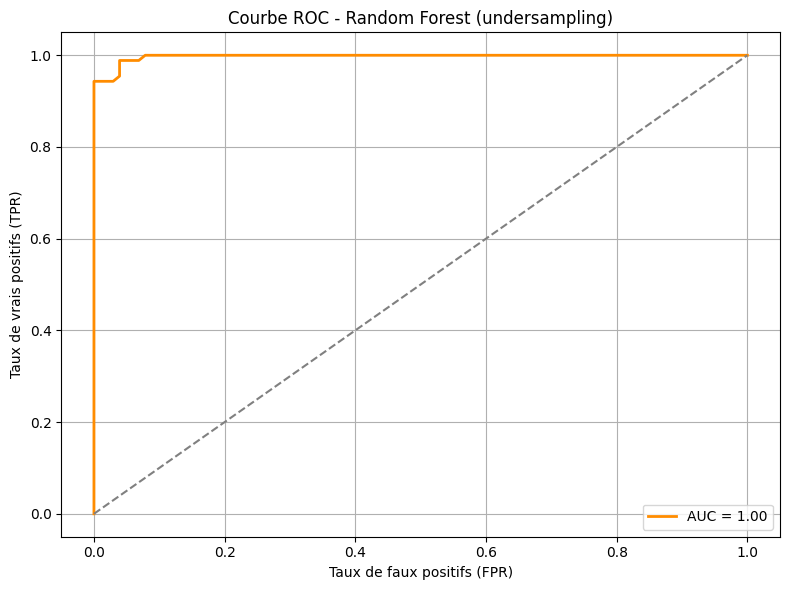

In [15]:
# 6. Modèle Random Forest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Prédictions et probabilités
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 8. Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - Random Forest (undersampling)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion Matrix:
[[100   2]
 [  7  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.92      0.95        88

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



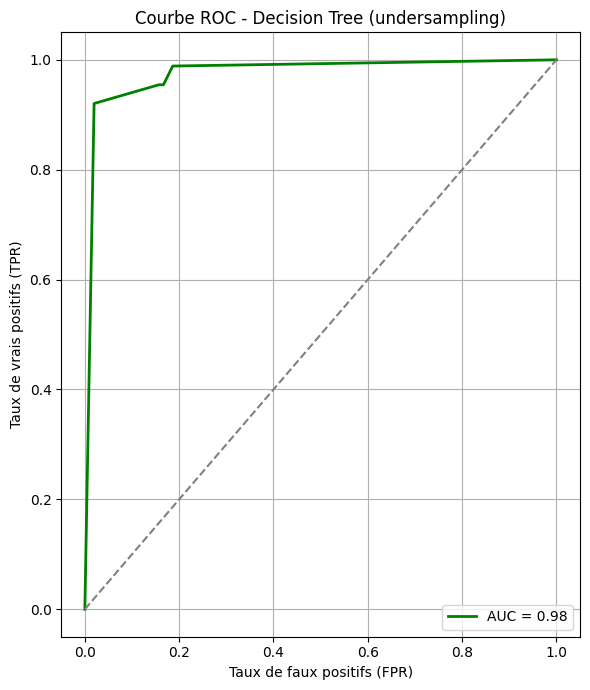

In [16]:
# 6. Modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)

# 7. Prédictions
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

# 8. Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - Decision Tree (undersampling)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion Matrix:
[[100   2]
 [  6  82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       0.98      0.93      0.95        88

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



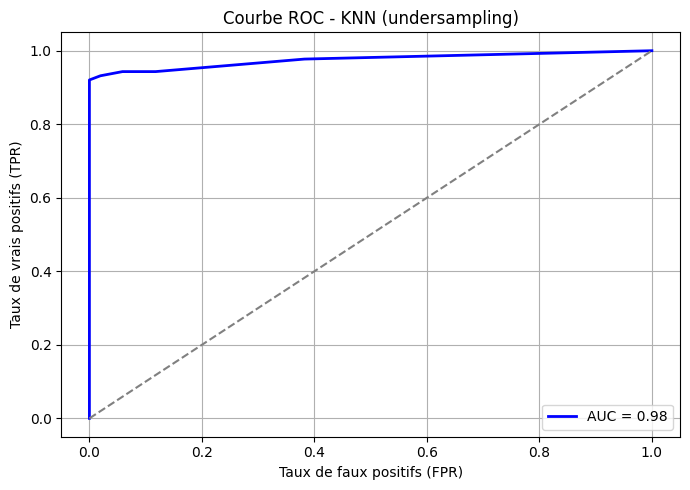

In [17]:
# 6. Normalisation globale (important pour KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Modèle KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# 8. Prédictions
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# 9. Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - KNN (undersampling)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion Matrix:
[[101   1]
 [  5  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       102
           1       0.99      0.94      0.97        88

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



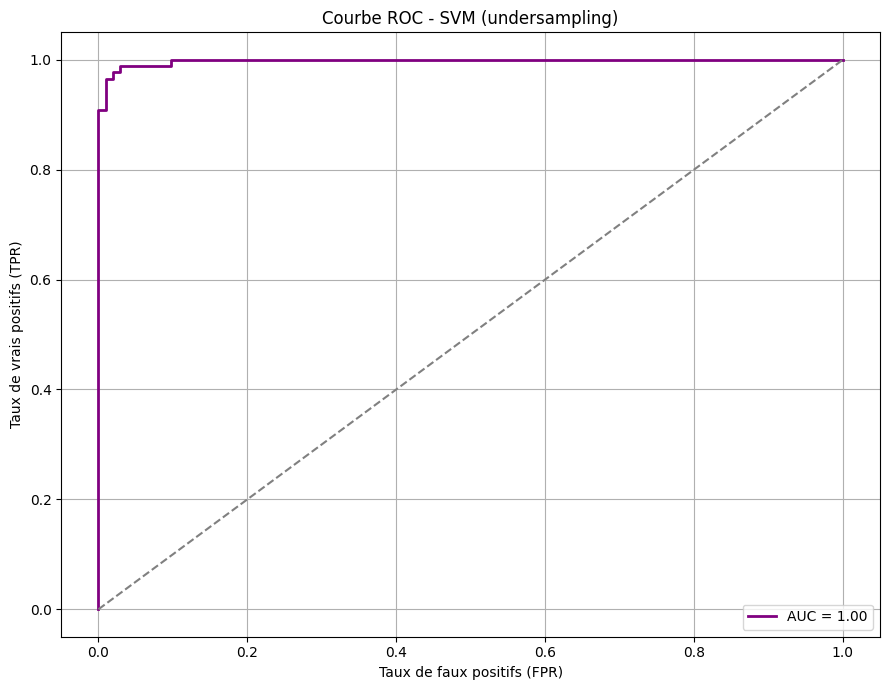

In [18]:
# 6. Normalisation (très important pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Modèle SVM avec probabilités
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# 8. Prédictions
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

# 9. Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="purple", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - SVM (undersampling)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
[[95  7]
 [ 3 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       102
           1       0.92      0.97      0.94        88

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



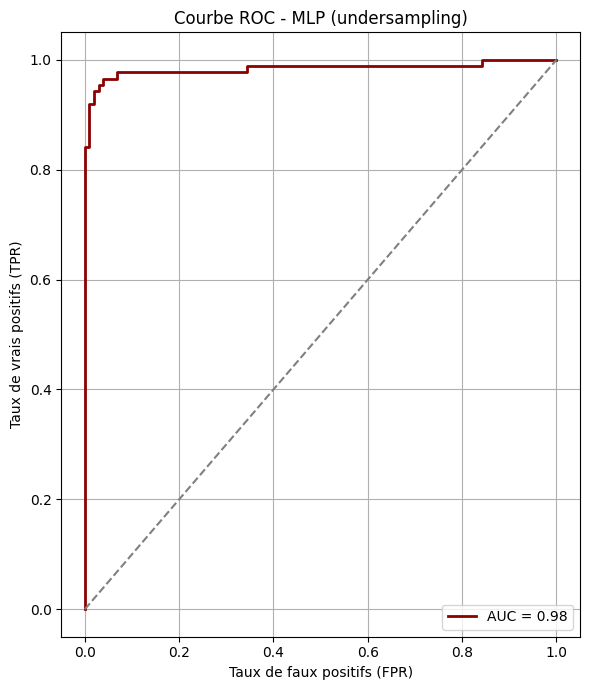

In [22]:
# 6. Normalisation (nécessaire pour MLP)
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 8. Prédictions
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

# 9. Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkred", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - MLP (undersampling)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


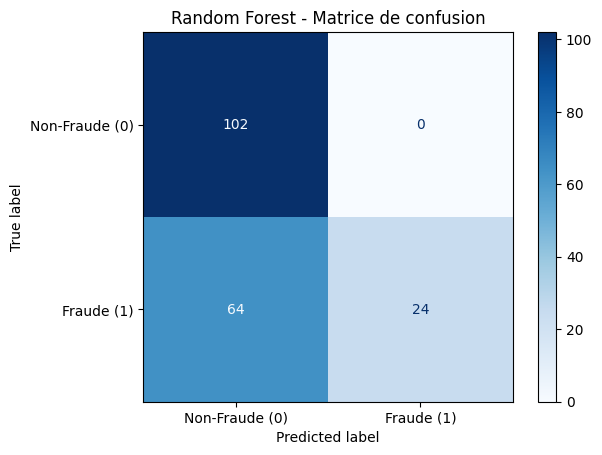

In [34]:
# Calcul matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_rf = model.predict(X_test_scaled)
rf_matrix = confusion_matrix(y_test, y_pred_rf)
# Affichage avec sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Matrice de confusion")
plt.savefig('rf_cm_plot.png')
plt.show()

C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


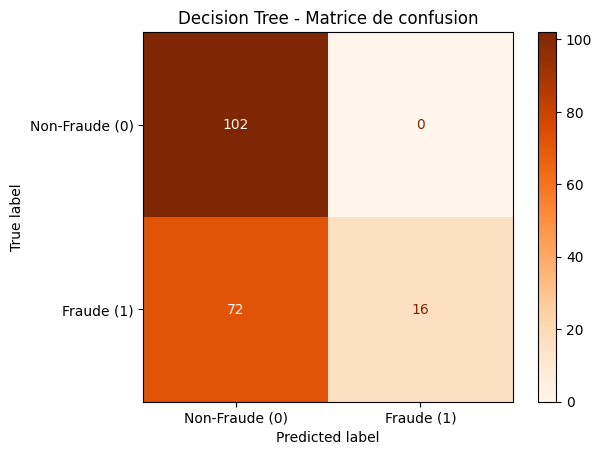

In [36]:

# 2. Prédictions sur le jeu test
y_pred_dt = dt.predict(X_test_scaled)

# 3. Matrice de confusion
dt_matrix = confusion_matrix(y_test, y_pred_dt)

# 4. Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=dt_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Decision Tree - Matrice de confusion")
plt.savefig('dt_cm_plot.png')
plt.show()

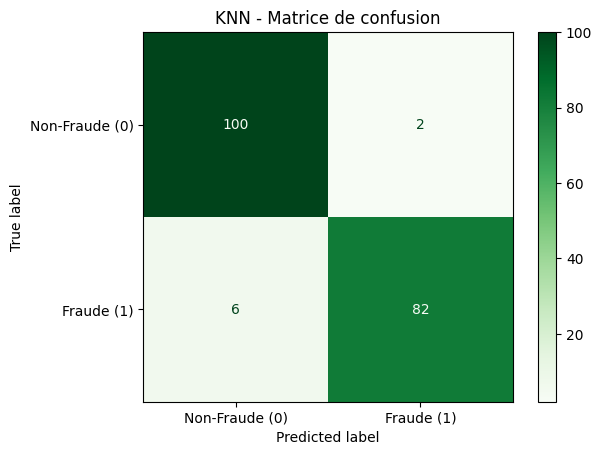

In [37]:
# 2. Prédictions
y_pred_knn = knn.predict(X_test_scaled)

# 3. Matrice de confusion
knn_matrix = confusion_matrix(y_test, y_pred_knn)

# 4. Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=knn_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Greens)
plt.title("KNN - Matrice de confusion")
plt.savefig('knn_cm_plot.png')
plt.show()

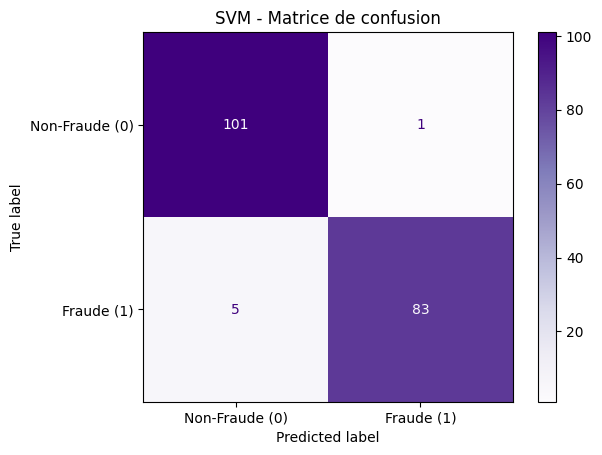

In [38]:
# 2. Prédictions
y_pred_svm = svm.predict(X_test_scaled)

# 3. Matrice de confusion
svm_matrix = confusion_matrix(y_test, y_pred_svm)

# 4. Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=svm_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Purples)
plt.title("SVM - Matrice de confusion")
plt.savefig('svm_cm_plot.png')
plt.show()

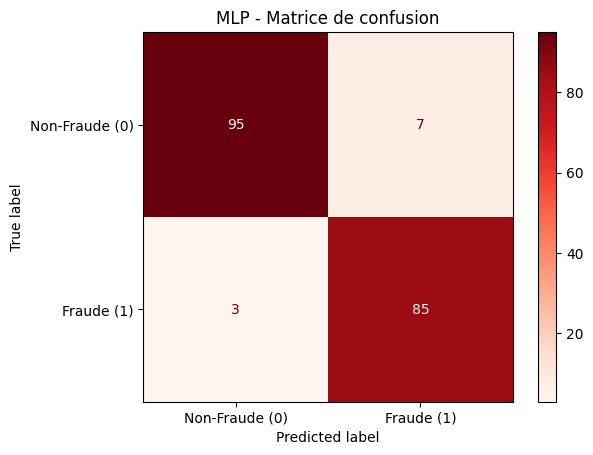

In [39]:
# 2. Prédictions
y_pred_mlp = mlp.predict(X_test_scaled)

# 3. Matrice de confusion
mlp_matrix = confusion_matrix(y_test, y_pred_mlp)

# 4. Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Reds)
plt.title("MLP - Matrice de confusion")
plt.savefig('mlp_cm_plot.png')
plt.show()